In [2]:
%reload_ext autoreload
%autoreload 2

import os, sys
sys.path.append('..')

import numpy as np

import dm21cm.physics as phys

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
mpl.rc_file('../matplotlibrc')

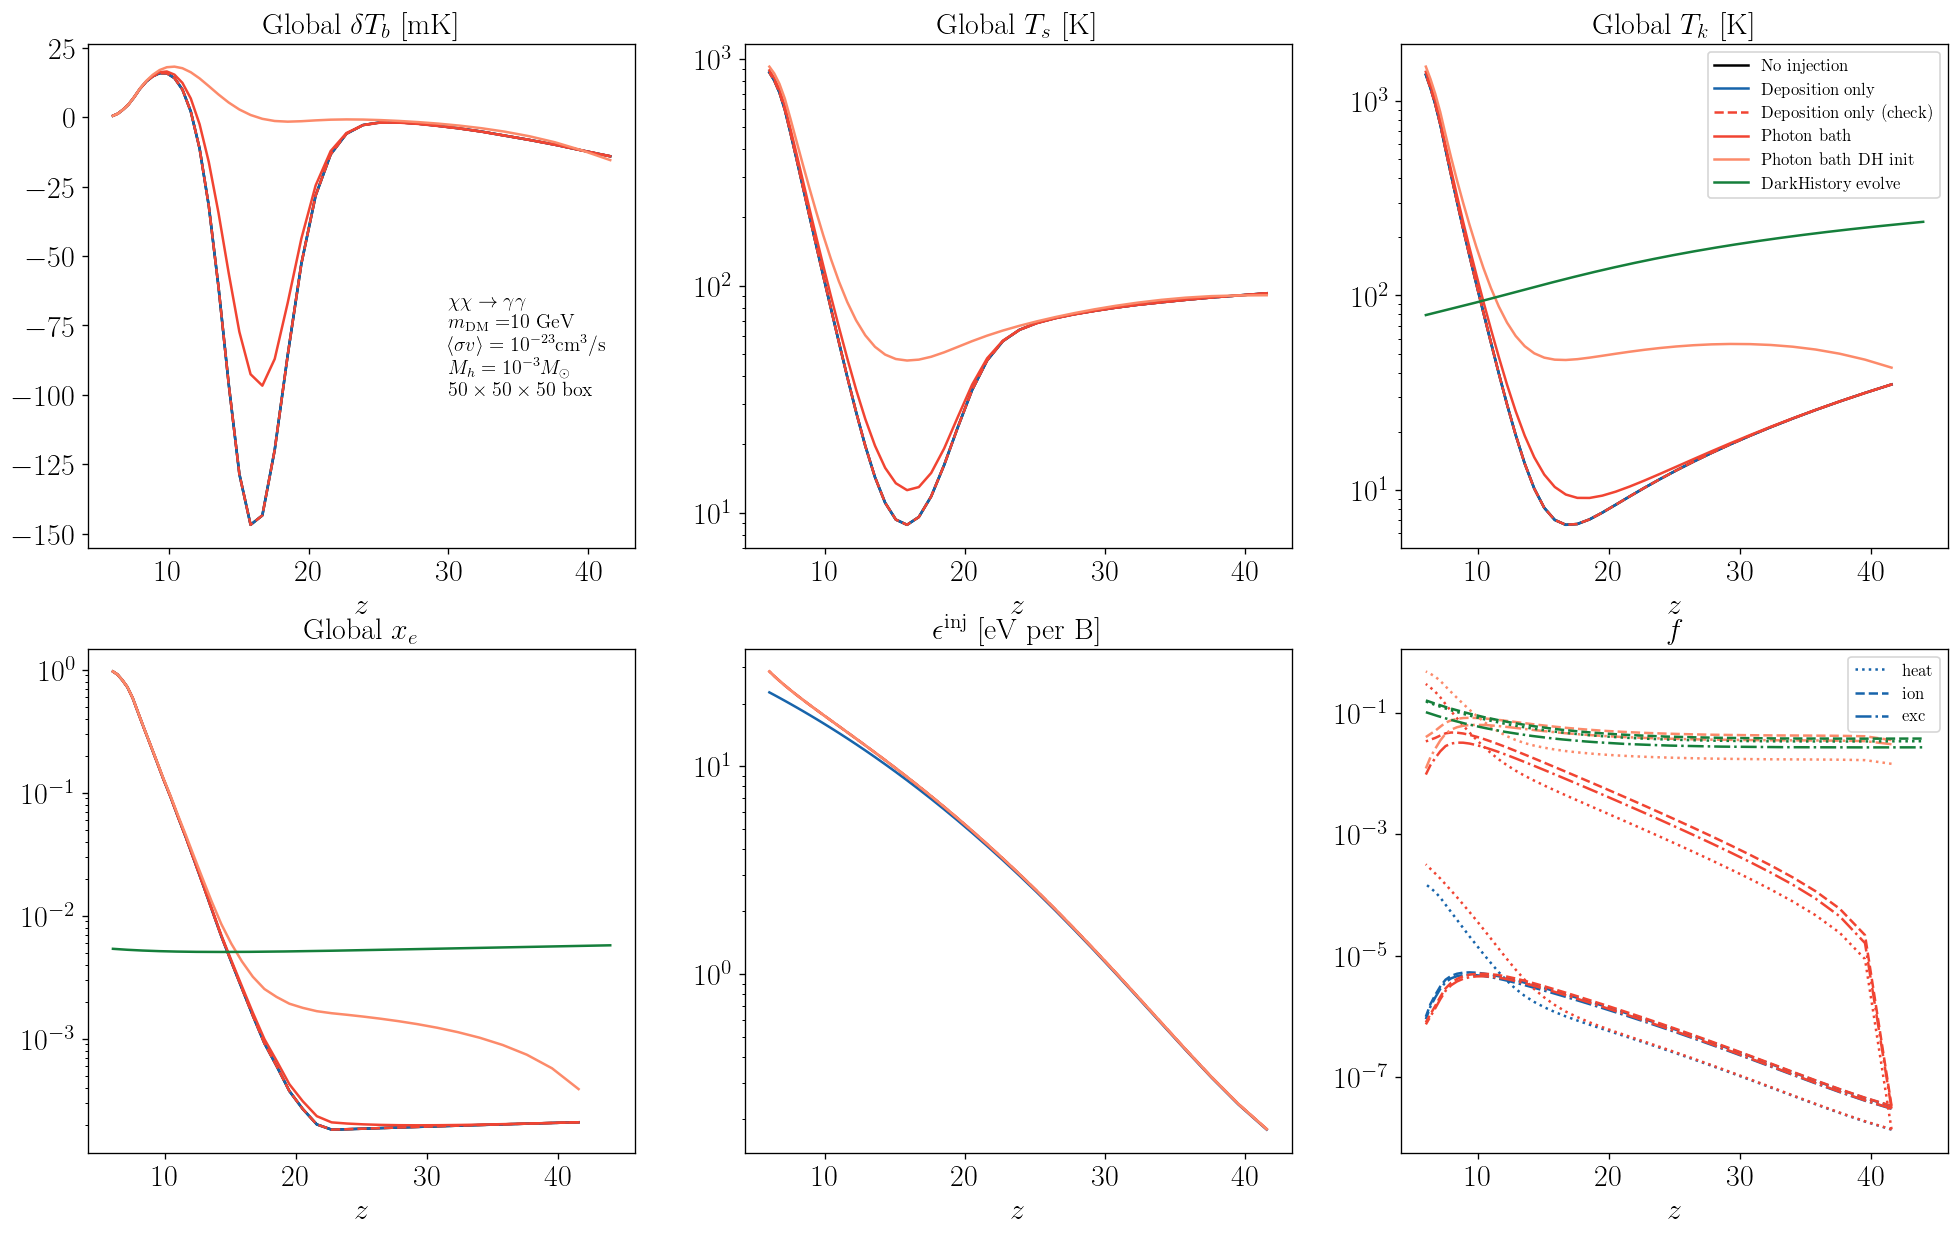

In [25]:
plot_options = {
    'base'     : dict(color='black'),
    'phph_dh_mh3' : dict(color=cm.get_cmap('Blues')(0.8)),
    'phph_dh_phbath_mh3_nophot' : dict(color=cm.get_cmap('Reds')(0.6), linestyle='--'),
    'phph_dh_phbath_mh3' : dict(color=cm.get_cmap('Reds')(0.6)),
    'phph_dh_phbath_mh3_dhinit' : dict(color=cm.get_cmap('Reds')(0.4)),
    'rundh_phph_mh3' : dict(color=cm.get_cmap('Greens')(0.8)),
}

labels = {
    'T_b' : {
    },
    'T_s' : {
    },
    'T_k' : {
        'base' : r'No injection',
        'phph_dh_mh3' : r'Deposition only',
        'phph_dh_phbath_mh3_nophot' : r'Deposition only (check)',
        'phph_dh_phbath_mh3' : r'Photon bath',
        'phph_dh_phbath_mh3_dhinit' : r'Photon bath DH init',
        'rundh_phph_mh3' : r'DarkHistory evolve',
    },
    'f' : {
        'phph_dh_mh3' : 'yes',
    }
}

fig, axs = plt.subplots(2, 3, figsize=(20, 12))

for name in ['base', 'phph_dh_mh3', 'phph_dh_phbath_mh3_nophot', 'phph_dh_phbath_mh3', 'phph_dh_phbath_mh3_dhinit',
             'rundh_phph_mh3']:
    
    records = np.load(f'../data/run_info/{name}_records.npy', allow_pickle=True).item()
    
    if 'rundh' not in name:
        axs[0,0].plot(records['z'], records['T_b'],
                      label=(labels['T_b'][name] if name in labels['T_b'].keys() else None), **plot_options[name])
        axs[0,1].plot(records['z'], records['T_s'],
                      label=(labels['T_s'][name] if name in labels['T_s'].keys() else None), **plot_options[name])
    axs[0,2].plot(records['z'], records['T_k'],
                  label=(labels['T_k'][name] if name in labels['T_k'].keys() else None), **plot_options[name])
    axs[1,0].plot(records['z'], records['x_e'], **plot_options[name])
    
    if ('base' not in name) and ('rundh' not in name):
        axs[1,1].plot(records['z'], records['dE_inj_per_B'], **plot_options[name])
        
    if 'base' not in name:
        plot_options[name].update(linestyle=':')
        axs[1,2].plot(records['z'], records['f_heat'],
                      label=('heat' if name in labels['f'].keys() else None), **plot_options[name])
        plot_options[name].update(linestyle='--')
        axs[1,2].plot(records['z'], records['f_ion'],
                      label=('ion' if name in labels['f'].keys() else None), **plot_options[name])
        plot_options[name].update(linestyle='-.')
        axs[1,2].plot(records['z'], records['f_exc'],
                      label=('exc' if name in labels['f'].keys() else None), **plot_options[name])

axs[0,0].set(title=r'Global $\delta T_b$ [mK]', xlabel=r'$z$')
axs[0,1].set(title=r'Global $T_s$ [K]', xlabel=r'$z$')
axs[0,2].set(title=r'Global $T_k$ [K]', xlabel=r'$z$')
axs[1,0].set(title=r'Global $x_e$', xlabel=r'$z$')
axs[1,1].set(title=r'$\epsilon^\mathrm{inj}$ [eV per B]', xlabel=r'$z$')
axs[1,2].set(title=r'$f$', xlabel=r'$z$')

axs[0,1].set(yscale='log')
axs[0,2].set(yscale='log')
axs[1,0].set(yscale='log')
axs[1,1].set(yscale='log')
axs[1,2].set(yscale='log')

textstr = r'$\chi\chi\rightarrow\gamma\gamma$' + '\n' + \
          r'$m_\mathrm{DM}=$10~GeV' + '\n' + \
          r'$\langle\sigma v\rangle=10^{-23}\mathrm{cm}^3/\mathrm{s}$' + '\n' + \
          r'$M_h=10^{-3}M_\odot$' + '\n' + \
          r'$50\times50\times50$ box'

axs[0,0].text(30, -100, textstr, fontsize=12)
#axs[0,0].legend(fontsize=10)
#axs[0,1].legend(fontsize=10)
axs[0,2].legend(fontsize=10)
axs[1,2].legend(fontsize=10);

In [53]:
np.load(f'../data/run_info/phph_dh_mh3_records.npy', allow_pickle=True).item()['T_b'] - \
np.load(f'../data/run_info/base_records.npy', allow_pickle=True).item()['T_b']

array([-9.53674316e-07, -3.81469727e-06, -5.72204590e-06, -9.53674316e-06,
       -1.81198120e-05, -2.33650208e-05, -2.86102295e-05, -3.98159027e-05,
       -4.88758087e-05, -4.95910645e-05, -4.29153442e-05, -7.39097595e-06,
        1.28269196e-04,  5.13076782e-04,  1.47247314e-03,  3.54003906e-03,
        7.20977783e-03,  1.24435425e-02,  1.77001953e-02,  2.04772949e-02,
        1.89666748e-02,  1.39236450e-02,  8.62121582e-03,  4.73785400e-03,
        2.39086151e-03,  1.18184090e-03,  5.71250916e-04,  2.72750854e-04,
        1.30653381e-04,  6.10351562e-05,  3.05175781e-05,  1.43051147e-05,
        4.76837158e-06,  1.43051147e-06,  0.00000000e+00,  0.00000000e+00,
       -1.19209290e-07,  0.00000000e+00], dtype=float32)